In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  7 10:01:40 2020

@author: afelice
"""

import pandas as pd

data = pd.read_pickle('gep_consumptions.pkl').loc['01/01/2015 00:00':
                                                 '31/12/2019 23:45']
data = data.drop('Building 5', axis=1)    
# Remove 29th February
data = data.drop(data.index[40704:40800])


def df_yearly_column(building, data):
    
    df = pd.DataFrame()
    df['2015'] = pd.Series(data[building].loc['01/01/2015 00:00':'31/12/2015 23:45'].values)
    df['2016'] = pd.Series(data[building].loc['07/01/2016 00:00':'31/12/2016 23:45'].values)
    df['2017'] = pd.Series(data[building].loc['05/01/2017 00:00':'31/12/2017 23:45'].values)
    df['2018'] = pd.Series(data[building].loc['04/01/2018 00:00':'31/12/2018 23:45'].values)
    df['2019'] = pd.Series(data[building].loc['03/01/2019 00:00':'31/12/2019 23:45'].values)

    return df

building_1 = df_yearly_column('Building 1', data)
building_2 = df_yearly_column('Building 2', data)
building_3 = df_yearly_column('Building 3', data)

building_1['Average'] = building_1.mean(axis=1)
building_2['Average'] = building_2.mean(axis=1)
building_3['Average'] = building_3.mean(axis=1)

building_1['Maximum'] = building_1.max(axis=1)
building_2['Maximum'] = building_2.max(axis=1)
building_3['Maximum'] = building_3.max(axis=1)

building_1['Minimum'] = building_1.min(axis=1)
building_2['Minimum'] = building_2.min(axis=1)
building_3['Minimum'] = building_3.min(axis=1)

building_1['Average scaled'] = building_1['Average']/building_1['Average'].max()
building_2['Average scaled'] = building_2['Average']/building_2['Average'].max()
building_3['Average scaled'] = building_3['Average']/building_3['Average'].max()

total_cons = []
total_cons.append(building_1['Average'].sum())
total_cons.append(building_2['Average'].sum())
total_cons.append(building_3['Average'].sum())

building_1['% per timestep'] = building_1['Average']/total_cons[0]*100
building_2['% per timestep'] = building_2['Average']/total_cons[1]*100
building_3['% per timestep'] = building_3['Average']/total_cons[2]*100

# this can run only on the building 4 folder
# data_4 = pd.read_pickle('building_4_cnsumptions.pkl').loc['01/01/2019 00:00':'31/12/2019 23:45']
# data_4.columns = ['2019']
# building_4 = data_4
# building_4['Average scaled'] = building_4/building_4.max()
# total_cons.append(building_4['2019'].sum())
# building_4['% per timestep'] = building_4['2019']/total_cons[3]*100


In [2]:
building_1.head()

,2015,2016,2017,2018,2019,Average,Maximum,Minimum,Average scaled,% per timestep
0,8.19,7.35,6.72,5.04,6.30,6.720,8.19,5.04,0.209974,0.001718
1,7.77,7.14,6.72,4.83,6.09,6.510,7.77,4.83,0.203412,0.001664
2,7.98,7.14,6.72,4.83,6.30,6.594,7.98,4.83,0.206037,0.001686
3,7.77,6.72,6.93,4.83,6.30,6.510,7.77,4.83,0.203412,0.001664
4,7.98,6.93,6.93,4.83,6.30,6.594,7.98,4.83,0.206037,0.001686


In [3]:
building_1

,2015,2016,2017,2018,2019,Average,Maximum,Minimum,Average scaled,% per timestep
0,8.19,7.35,6.72,5.04,6.30,6.720,8.19,5.04,0.209974,0.001718
1,7.77,7.14,6.72,4.83,6.09,6.510,7.77,4.83,0.203412,0.001664
2,7.98,7.14,6.72,4.83,6.30,6.594,7.98,4.83,0.206037,0.001686
3,7.77,6.72,6.93,4.83,6.30,6.510,7.77,4.83,0.203412,0.001664
4,7.98,6.93,6.93,4.83,6.30,6.594,7.98,4.83,0.206037,0.001686
5,7.98,6.93,7.14,4.83,6.30,6.636,7.98,4.83,0.207349,0.001696
6,7.56,6.93,6.93,4.83,6.09,6.468,7.56,4.83,0.202100,0.001653
7,7.77,9.03,6.72,4.62,5.88,6.804,9.03,4.62,0.212598,0.001739
8,7.77,7.56,6.93,4.83,6.30,6.678,7.77,4.83,0.208661,0.001707
9,7.77,6.93,6.93,4.83,6.30,6.552,7.77,4.83,0.204724,0.001675


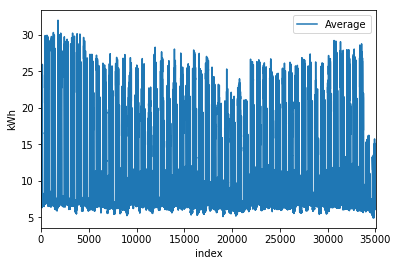

In [16]:
from matplotlib import pyplot
building_1.plot(y='Average')
pyplot.xlabel("index")
pyplot.ylabel("kWh")
pyplot.show()

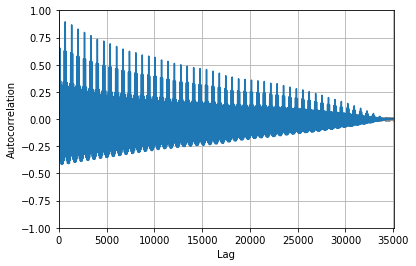

In [21]:
x = pd.plotting.autocorrelation_plot(building_1['2015']) 
  
# ploting the Curve 
x.plot() 
  
# Display 
pyplot.show()

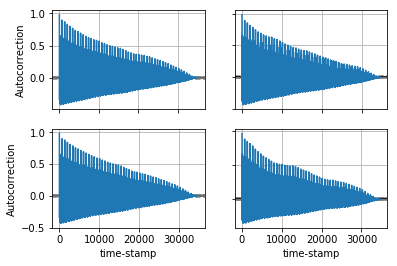

In [81]:
import numpy as np
fig, axs = pyplot.subplots(2,2)
x = pd.plotting.autocorrelation_plot(building_1['2015'], ax=axs[0,0]) 
x1  = pd.plotting.autocorrelation_plot(building_1[~np.isnan(building_1['2016'])]['2016'],ax=axs[0,1])
x2  = pd.plotting.autocorrelation_plot(building_1[~np.isnan(building_1['2017'])]['2017'],ax=axs[1,0])
x3  = pd.plotting.autocorrelation_plot(building_1[~np.isnan(building_1['2018'])]['2018'],ax=axs[1,1])

for ax in axs.flat:
    ax.set(xlabel='time-stamp', ylabel='Autocorrection')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [77]:
building_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
2015              35040 non-null float64
2016              34464 non-null float64
2017              34656 non-null float64
2018              34752 non-null float64
2019              34848 non-null float64
Average           35040 non-null float64
Maximum           35040 non-null float64
Minimum           35040 non-null float64
Average scaled    35040 non-null float64
% per timestep    35040 non-null float64
dtypes: float64(10)
memory usage: 2.7 MB


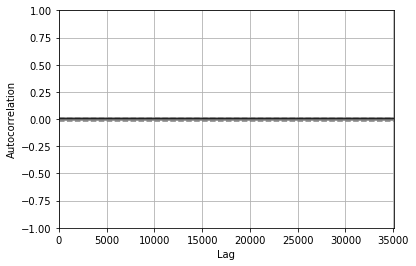